In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
data_train = pd.read_csv('dataset/train.csv')

<AxesSubplot:>

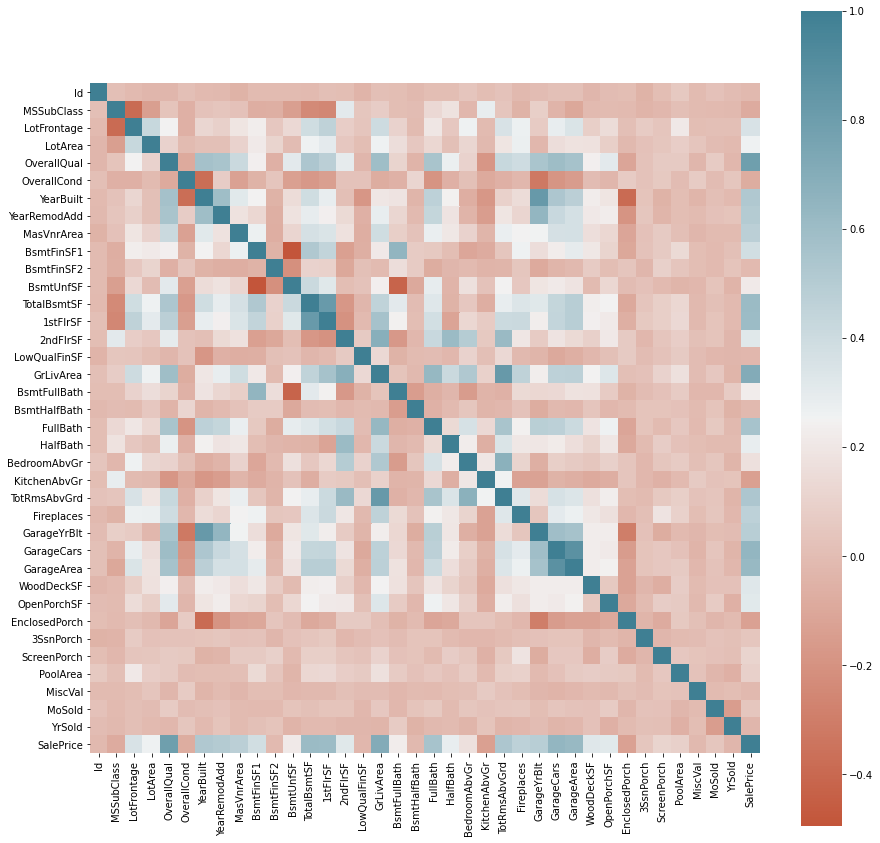

In [91]:
# 1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

corrmat = data_train.corr()
fig, _ = plt.subplots(figsize=(15, 15))
color_scheme = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corrmat, cmap=color_scheme, square=True)

<AxesSubplot:>

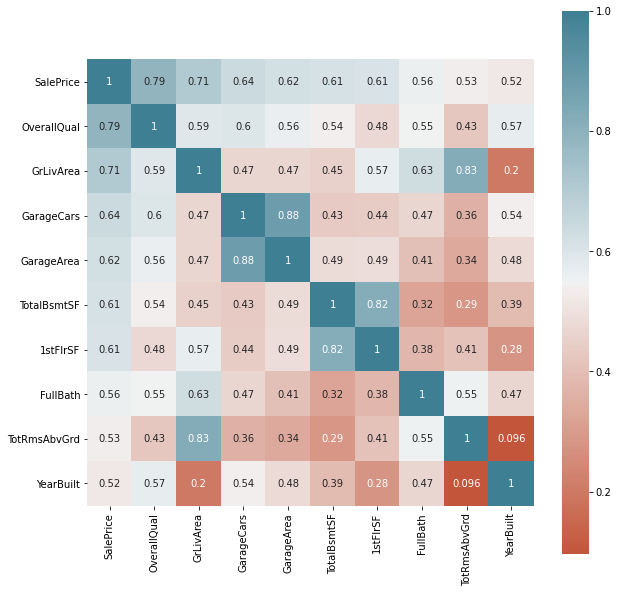

In [92]:
# based on the correlation heatmap, the sale price is more dependent on the following:
#    1. OverallQual
#    2. GrLiveArea
#    3. GarageCars
#    4. GarageArea
#    5. TotalBsmtSF
#    6. 1stFlrSF
# creating a correlation heatmap with these values
cols = corrmat.nlargest(10, 'SalePrice').index
new_cormat = np.corrcoef(data_train[cols].to_numpy().T)

fig, _ = plt.subplots(figsize=(10, 10))
sns.heatmap(new_cormat, cmap=color_scheme, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

1.8828757597682129
6.536281860064529


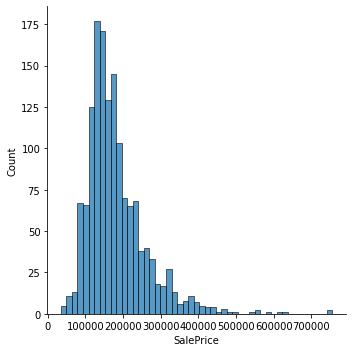

In [33]:
sns.displot(data_train['SalePrice'], kind='hist')

# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed
print(data_train['SalePrice'].skew())